In [7]:

import matplotlib.pyplot as plt  
import numpy as np
from scipy.io import loadmat
import spectral

# # 获取mat格式的数据，loadmat输出的是dict，所以需要进行定位
input_image = loadmat('KSC.mat')['KSC']
output_image = loadmat('KSC_gt.mat')['KSC_gt']
# print(output_image.shape)
# print(input_image.shape)
# # input_image.shape#:(610, 340, 103)
# # output_image.shape#:(610, 340)
# # np.unique(output_image)  # array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)


print(output_image.shape)
print(input_image.shape)




(512, 614)
(512, 614, 176)


In [9]:
from functools import reduce  # 添加这一行以导入reduce函数
# 统计每类样本所含个数
dict_k = {}
for i in range(output_image.shape[0]):
    for j in range(output_image.shape[1]):
        #if output_image[i][j] in [m for m in range(1,17)]:
        if output_image[i][j] in [1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13]:
            if output_image[i][j] not in dict_k:
                dict_k[output_image[i][j]]=0
            dict_k[output_image[i][j]] +=1
            
print (dict_k)
print (reduce(lambda x,y:x+y,dict_k.values()))

# {1: 6631, 2: 18649, 3: 2099, 4: 3064, 5: 1345, 6: 5029, 7: 1330, 8: 3682, 9: 947}
# 42776


{8: 431, 12: 503, 13: 927, 11: 419, 5: 161, 1: 761, 4: 252, 6: 229, 2: 243, 3: 256, 10: 404, 7: 105, 9: 520}
5211


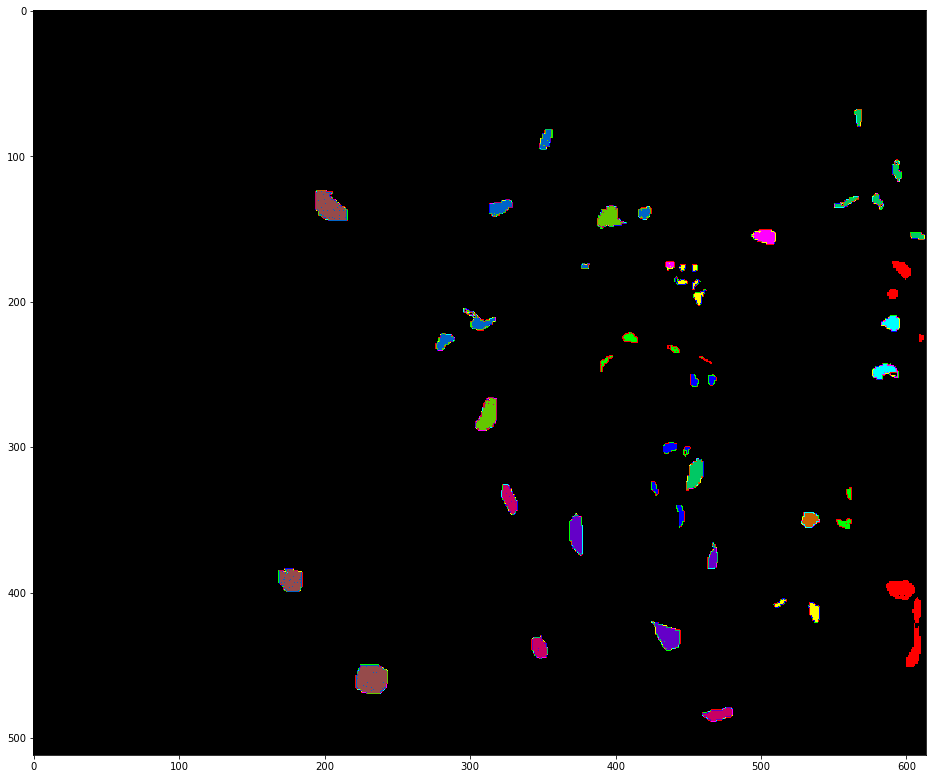

In [10]:
# 展示地物
ground_truth = spectral.imshow(classes = output_image.astype(int),figsize =(16,16))


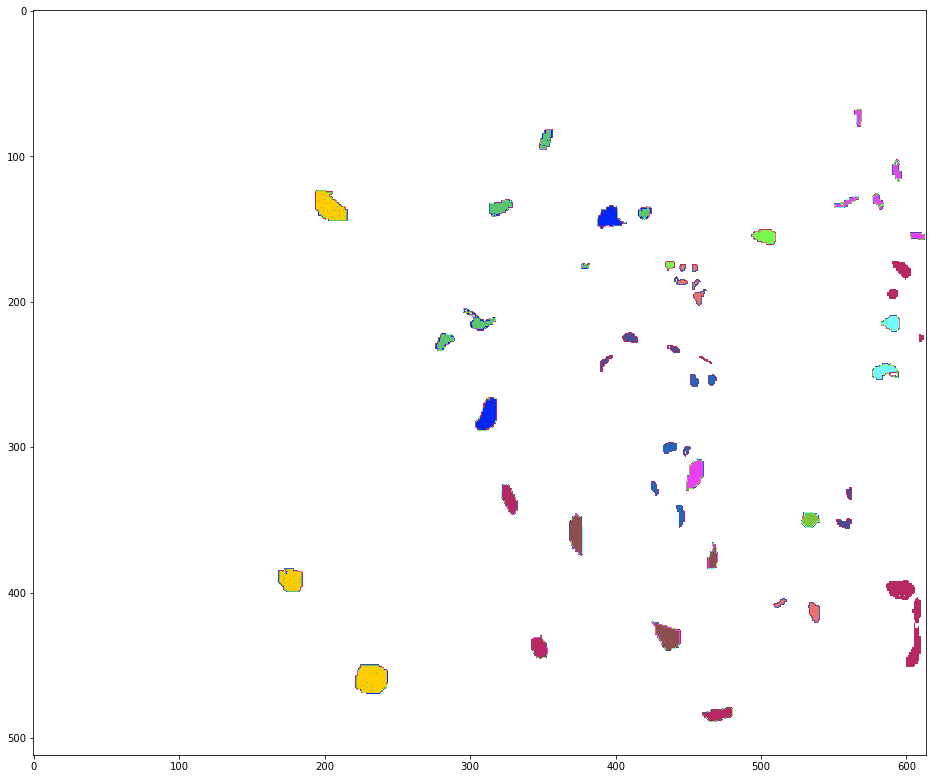

In [11]:
ksc_color = np.array([[255, 255, 255],
                      [184, 40, 99],
                      [74, 77, 145],
                      [35, 102, 193],
                      [238, 110, 105],
                      [117, 249, 76],
                      [114, 251, 253],
                      [126, 196, 59],
                      [234, 65, 247],
                      [141, 79, 77],
                      [183, 40, 99],
                      [0, 39, 245],
                      [90, 196, 111],
                      [255, 204, 0],    # 添加的颜色
                      [0, 204, 255],    # 添加的颜色
                      [255, 0, 128],     # 添加的颜色
                      [100, 100, 100]  # 添加的颜色
                      ])

ground_truth = spectral.imshow(classes = output_image.astype(int),figsize =(16,16),colors=ksc_color)


In [12]:
# 除掉 0 这个非分类的类，把所有需要分类的元素提取出来
need_label = np.zeros([output_image.shape[0],output_image.shape[1]])
for i in range(output_image.shape[0]):
    for j in range(output_image.shape[1]):
        if output_image[i][j] != 0:
        #if output_image[i][j] in [1,2,3,4,5,6,7,8,9]:
            need_label[i][j] = output_image[i][j]
        
            
new_datawithlabel_list = []
for i in range(output_image.shape[0]):
    for j in range(output_image.shape[1]):
        if need_label[i][j] != 0:
            c2l = list(input_image[i][j])
            c2l.append(need_label[i][j])
            new_datawithlabel_list.append(c2l)

new_datawithlabel_array = np.array(new_datawithlabel_list)  
# new_datawithlabel_array.shape (5211,177),包含了数据维度和标签维度，数据176维度，也就是176个波段，最后177列是标签维
print(new_datawithlabel_array.shape)

(5211, 177)


In [14]:
from sklearn import preprocessing

#加载处理过后的原始数据
new_datawithlabel_array = np.array(new_datawithlabel_list)  # 原始数据，形状为 (N, 177)
# 1. 随机选取10个波段
num_bands = 176  # 总共有176个波段
random_bands = np.random.choice(range(num_bands), size=10, replace=False)  # 随机选10个波段
print(f"随机选取的波段索引: {random_bands}")



# 提取随机选择的波段的数据和标签
# new_datawithlabel_array[:,:-1] 代表光谱数据，最后一列是标签
data_selected_bands = new_datawithlabel_array[:, random_bands]  # 选取10个随机波段的数据
print(data_selected_bands.shape)
data_L = new_datawithlabel_array[:, -1]  # 提取标签列
print(data_L.shape)

# 3. 组合随机选择的波段和标签
data_with_selected_bands = np.column_stack((data_selected_bands, data_L))
print(data_with_selected_bands.shape)
# 4. 归一化
data_D = preprocessing.StandardScaler().fit_transform(data_with_selected_bands[:, :-1] ) # 特征（随机10个波段的数据）
data_L = data_with_selected_bands[:, -1]   # 标签
print(data_D.shape)
print(data_L.shape)

随机选取的波段索引: [  2 170 120  13  65 109  70  34 174  22]
(5211, 10)
(5211,)
(5211, 11)
(5211, 10)
(5211,)


### 人工输入标签索引

In [17]:
# # 加载处理过后的原始数据
# new_datawithlabel_array = np.array(new_datawithlabel_list)  # 原始数据，形状为 (N, 177)

# # 1. 人工输入选择的波段索引
# # 通过用户输入的方式选择特定的波段索引，假设用户输入的是逗号分隔的索引值
# input_bands = input("请输入波段索引（用逗号分隔，如：1,10,15）：")
# input_bands = [int(x) for x in input_bands.split(',')]  # 将输入的字符串转换为整数列表

# print(f"用户选择的波段索引: {input_bands}")

# # 2. 提取用户选择的波段的数据和标签
# data_selected_bands = new_datawithlabel_array[:, input_bands]  # 选取指定波段的数据
# data_L = new_datawithlabel_array[:, -1]  # 提取标签列

# # 3. 组合用户选择的波段和标签
# data_with_selected_bands = np.column_stack((data_selected_bands, data_L))

# # 4. 数据标准化
# data_D = preprocessing.StandardScaler().fit_transform(data_with_selected_bands[:, :-1])  # 标准化特征数据
# data_L = data_with_selected_bands[:, -1]  # 标

In [15]:
# 将结果存档后续处理
import pandas as pd  
new = np.column_stack((data_D,data_L))
new_ = pd.DataFrame(new)
new_.to_csv('KSC_sel.csv',header=False,index=False)


In [16]:
# 验证高光谱数据的分类结果，并在图中进行分类结果的标记


import joblib
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
import pandas as pd


# 导入数据集切割训练与测试数据

data = pd.read_csv('KSC_sel.csv',header=None)
data = data.to_numpy()
data_D = data[:,:-1]
data_L = data[:,-1]
data_train, data_test, label_train, label_test = train_test_split(data_D,data_L,test_size=0.3)

#随机分的


# 模型训练与拟合
clf = SVC(kernel='rbf',gamma=0.125,C=16)
clf.fit(data_train,label_train)
pred = clf.predict(data_test)
accuracy = metrics.accuracy_score(label_test, pred)*100
print (accuracy)


# 存储结果学习模型，方便之后的调用
joblib.dump(clf, "KSC_sel_MODEL.m")




92.71099744245525


['KSC_sel_MODEL.m']

93.51372097486087


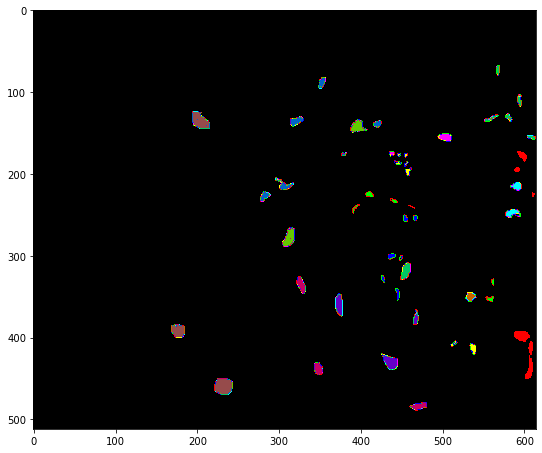

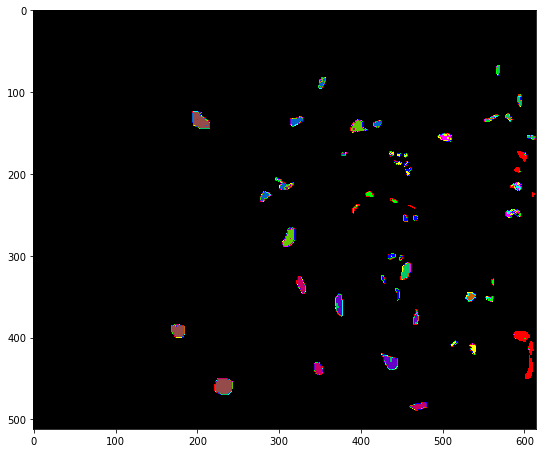

In [17]:
# mat文件的导入
import matplotlib.pyplot as plt  
import numpy as np
from scipy.io import loadmat
import spectral



input_image = loadmat('KSC.mat')['KSC']
output_image = loadmat('KSC_gt.mat')['KSC_gt']
testdata = np.genfromtxt('KSC_sel.csv',delimiter=',')

data_test = testdata[:,:-1]
label_test = testdata[:,-1]

# /Users/mrlevo/Desktop/CBD_HC_MCLU_MODEL.m
clf = joblib.load("KSC_sel_MODEL.m")

predict_label = clf.predict(data_test)
accuracy = metrics.accuracy_score(label_test, predict_label)*100

print (accuracy) # 97.1022836308


# 将预测的结果匹配到图像中
new_show = np.zeros((output_image.shape[0],output_image.shape[1]))
k = 0
for i in range(output_image.shape[0]):
    for j in range(output_image.shape[1]):
        if output_image[i][j] != 0 :
            new_show[i][j] = predict_label[k]
            k +=1 
            
# print new_show.shape

# 展示地物
ground_truth = spectral.imshow(classes = output_image.astype(int),figsize =(9,9))
ground_predict = spectral.imshow(classes = new_show.astype(int), figsize =(9,9))


